## Prerequisites

In [107]:
import matplotlib.pyplot
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.optimize import curve_fit
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')

In this notebook we will outline the analysis of simulation data for decay in heterozygosity of stochastic simulations of phage-host expansions, included in the most recent update for our pre-prin
**Virus-host interactions shape viral dispersal giving rise to distinct classes of travelling waves in spatial expansions
Michael Hunter, Nikhil Krishnan, Tongfei Liu, Wolfram Möbius, Diana Fusco
bioRxiv 2020.09.23.310201; doi: https://doi.org/10.1101/2020.09.23.310201**

The following notebook will have the code needed to reporudce the analysis and figures seen in this publication provided that the nessecary simulation data is on hand. This notebook and the data should be available at https://github.com/FuscoLab/plaque_growth_sdes. We will first describe the simulation algorithm used to generate this data

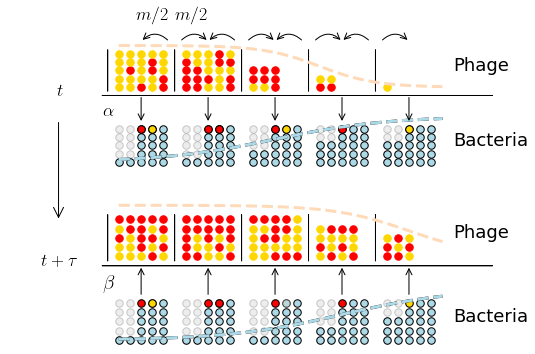

In [422]:
###Panel A, fig 6 in Hunter et. al.

fig,axs = plt.subplots(2,1,figsize=(8,6))

plt.rcParams.update({
    "text.usetex": True,})
#top panel 
ax=axs[0]
##set random seed
np.random.seed( 13)

ax.axis('off')
mSize = 56
bacBlue = 'lightblue'
virOran = 'peachpuff'
bacBuff=5
textSz = 18


###superimposed population profiles in continuous limit 
profx =np.arange(30)
ax.plot(profx,(5/(1+np.exp(.4*(profx-18)))),lw=3,linestyle='--',c=virOran)
ax.plot(profx,(5.5/(1+np.exp(-.2*(profx-14))))-bacBuff-4,lw=3,linestyle='--',c='k',alpha=1)
ax.plot(profx,(5.5/(1+np.exp(-.2*(profx-14))))-bacBuff-4,lw=3,linestyle='--',c=bacBlue,alpha=1)

#ax.set_xlim([0,30])
##d
###Assign marker for phage in each deme randomly, and plot
deme_x = np.arange(5)*6
colors = ['gold','red']
dims = [5,5,3,2,1]
for d,b in zip(np.array(dims),deme_x):
    for i in range(d):
        for j in range(d):
            ax.scatter(b+i,j,c=colors[np.random.randint(2)],s=mSize)            

            
            
##Plot some uninfected bacteria according to expected profile for an expansion 
dimsy = np.ones(5).astype(int)*5           
dimsx = np.ones(5).astype(int)*3 
for dx,dy,b in zip(np.array(dimsx),np.array(dimsy),deme_x):
    for i in range(dx):
        for j in range(dy):
            ax.scatter(b+2+i,-j-bacBuff,c=bacBlue,edgecolor='k',s=mSize)
            

            
##plot some infected bacteria  according to expected profile for an expansion 
dimsy = np.ones(5).astype(int)*5             
dimsx = np.ones(5).astype(int)*2
for dx,dy,b in zip(np.array(dimsx),np.array(dimsy),deme_x):
    for i in range(dx):
        for j in range(dy):
            ax.scatter(b+i,-j-bacBuff,c='lightgrey',edgecolor='grey',alpha=.4,s=mSize)

dimsy = [1,1,2,3,3]            
dimsx = np.ones(5).astype(int)*2
for dx,dy,b in zip(np.array(dimsx),np.array(dimsy),deme_x):
    for i in range(dx):
        for j in range(dy):
            ax.scatter(b+i,j-bacBuff-4,c=bacBlue,edgecolor='k',s=mSize)

#plot some phage in each deme to be absorbed, store their color for use in next panel            
col_abs=[]
dims5 = np.ones(5).astype(int)*5   
for d,b in zip(np.array(dims),deme_x):
        col_abs.append(colors[np.random.randint(2)])
        ax.scatter(b+2,-bacBuff,c=col_abs[-1],edgecolor='k',s=mSize)
for d,b in zip(np.array(dims),deme_x[:2]):
        col_abs.append(colors[np.random.randint(2)])
        ax.scatter(b+3,-bacBuff,c=col_abs[-1],edgecolor='k',s=mSize)
        

for d,b in zip(np.array(dims),deme_x[:3]):
        ax.scatter(b+3,-bacBuff,c=colors[np.random.randint(2)],edgecolor='k',s=mSize)


##arrow and label for migration
x=0
ax.text(x+1.5,8,r'$ m/2$',fontsize=textSz )

ax.text(x+5,8,r'$ m/2  $',fontsize=textSz )

for x in deme_x[0:4]:
    l = patches.FancyArrowPatch( (x+2, 5.5),(x+4.5, 5.5),arrowstyle="<-",mutation_scale=15,
                             connectionstyle="arc3,rad=-.5")
    r = patches.FancyArrowPatch( (x+5.5, 5.5),(x+8, 5.5),arrowstyle="->",mutation_scale=15,
                         connectionstyle="arc3,rad=-.5")
    ax.add_patch(l)
    ax.add_patch(r)
    
#for x in deme_x[0:4]:
    #ax.text(x+3.1,5,r'$\curvearrowleft$',fontsize=20)

    #ax.text(x+5.1,5,r'$\curvearrowright$',fontsize=20)


    
##label for binomially sampled absorbtion
#for x in np.array([0,10,20,30,40]):
ax.text(-1.4,-3.5, r'$\alpha $',fontsize=textSz )

##Arrow foor absorbed phage
#arrow_params = {'length_includes_head': True, 'shape': shape,
#                'head_starts_at_zero': head_starts_at_zero}
for x in deme_x:
    ax.arrow(x-1,-.5,0,5,clip_on= False)
    
for x in deme_x:
    ax.annotate("",
        xy=(x+2, -1), xycoords='data',
        xytext=(x+2, -4.3), textcoords='data',
        arrowprops=dict(arrowstyle="<-",
                        mutation_scale=15
                        ),
        )
    #ax.arrow(x+2,-1,0,-2,clip_on= False)

    

ax.arrow(-1.5,-1,35,0,clip_on= False)



#ax.text(-15,0, r'$t \rightarrow t+1$',fontsize=18)
#ax.text(-5, -5, 'Bacteria')

ax=axs[1]

ax.plot(profx,(5.5/(1+np.exp(.3*(profx-26)))),lw=3,linestyle='--',c=virOran)
ax.plot(profx,(5.5/(1+np.exp(-.2*(profx-20))))-bacBuff-4,lw=3,linestyle='--',c='k')
ax.plot(profx,(5.5/(1+np.exp(-.2*(profx-20))))-bacBuff-4,lw=3,linestyle='--',c=bacBlue)



ax.axis('off')
#colors = ['dark','orange']

dims = [5,5,5,4,3]
for d,b in zip(np.array(dims),deme_x):
    for i in range(d):
        for j in range(d):
            ax.scatter(b+i,j,c=colors[np.random.randint(2)],s=mSize)
            
dimsy = [4,4,4,4,4]            
dimsx = [3,3,3,3,3]
for dx,dy,b in zip(np.array(dimsx),np.array(dimsy),deme_x):
    for i in range(dx):
        for j in range(dy):
            ax.scatter(b+2+i,-j-bacBuff-1,c=bacBlue,edgecolor='k',s=mSize)
            
            
dimsy = [5,5,5,5,5]            
dimsx = [2,2,2,2,2]
for dx,dy,b in zip(np.array(dimsx),np.array(dimsy),deme_x):
    for i in range(dx):
        for j in range(dy):
            ax.scatter(b+i,-j-bacBuff,c='lightgrey',edgecolor='grey',alpha=.4,s=mSize)
            

dimsy = [1,1,1,2,3]            
dimsx = [2,2,2,2,2]
for dx,dy,b in zip(np.array(dimsx),np.array(dimsy),deme_x):
    for i in range(dx):
        for j in range(dy):
            ax.scatter(b+i,j-bacBuff-4,c=bacBlue,edgecolor='k',s=mSize)
            

for b in deme_x[:]:
    ax.scatter(b+ 3,-bacBuff,c=bacBlue,edgecolor='k',s=mSize)
    #ax.scatter(b+ 4,-4,c=bacBlue,edgecolor='k',s=mSize)
for b in deme_x:
    #ax.scatter(b+ 3,-4,c=bacBlue,edgecolor='k',s=mSize)
    ax.scatter(b+ 4,-bacBuff,c=bacBlue,edgecolor='k',s=mSize)
            
dims = [5,5,5,5,5]
for d,b in zip(np.array(dims),deme_x ):
        ax.scatter(b+2,-bacBuff,c='lightgrey',edgecolor='grey',alpha=.4,s=mSize)
        
for d,b in zip(np.array(dims),deme_x[:3]):
        ax.scatter(b+3,-bacBuff,c='lightgrey',edgecolor='grey',alpha=.4,s=mSize)
            
col_cnt=0
d=5,
b=0
ax.text(b-1.4,-3.5, r'$\beta $',fontsize=textSz+2 )


for d,b in zip(np.array(dims),deme_x ):
    ax.scatter(b+2,-bacBuff,c=col_abs[col_cnt],edgecolor='k',s=mSize)
    col_cnt+=1
    
for d,b in zip(np.array(dims),deme_x[:2] ):
    ax.scatter(b+3,-bacBuff,c=col_abs[col_cnt],edgecolor='k',s=mSize)
    #ax.text(b+5.5,-3, r'$\beta $',fontsize=14)
    col_cnt+=1
    
    
for x in deme_x:
    ax.arrow(x-1,-.5,0,5,clip_on= False)
    
#for x in np.array([0,8,16,24,32]):
#    ax.arrow(x+2,-4,0,2,clip_on= False, head_width=.5)
    
for x in deme_x[:]:
    #ax.arrow(x+3,-4,0,2,clip_on= False, head_width=.5)
    ax.annotate("",
    xy=(x+2, -4.3), xycoords='data',
    xytext=(x+2, -1), textcoords='data',
    arrowprops=dict(arrowstyle="<-",
            mutation_scale=15
                    ),
    )
    

ax.arrow(-1.5,-1,35,0,clip_on= False)

axs[0].text(-5.5,-1,r'$t$',fontsize=textSz )
axs[0].set_xlim([-10,30])
axs[1].set_xlim([-10,30])
axs[0].annotate("",
    xy=(-5.4, -4), xycoords='data',
    xytext=(-5.4, -16), textcoords='data',
    arrowprops=dict(arrowstyle="<-",
                    mutation_scale=25,
                    clip_on=False
                    ),
    )


axs[1].text(-7,-1,r'$t + \tau$',fontsize=textSz )

plt.rcParams.update({
    "text.usetex": False,})


for ax in axs:
    ax.text(30, 2, r'Phage',fontsize=textSz ,clip_on= False)
    ax.text(30, -7, r'Bacteria',fontsize=textSz ,clip_on= False)

#plt.subplots_adjust(hspace=0.05)
#plt.savefig('figs/sim_method.eps')

Our simulation alogirthm is carried out on a one-dimensional lattice. A finite number of lattice sites are distributed along a line and contain a fixed number of Bacteria $B_0$. Each deme is also initialized with some number of phage. In each time step, there is a migration step in which a proportion $m/2$ phage from each deme are exchanged with each of its neighbors, an absorption step in which the number of absorbing phage is binomial sampled i each deme from the $B_i V_i$, with probability $\alpha$ to infected currently unifected bacteria within the deme, and a lysis step in which the infected bacteria's state is advanced one time step, and bacteria with state $\tau$ are labeled as lysed and $\beta$ new phage are inserted into the deme.

The simulation box is peroidically shifted with uninfected bacteria placed ahead of the population and demes with a steady state number of phage omitted, with the number of phage omitted, recorded. In this way the simulation box stays in the co-moving frame of the population. 

When the traveling wave is established, all the free and absorbed phage are randomly labeled with one of two neutrals labels. The Average heterozygosity in the simulation box $H(t) = \frac{1}{M}\sum^M_i 2f_i(1-f_i)$, where $M$ is the total number of demes in the simulation box, and the fraction of one allele in deme $i$ is given by $f_i$, and for the other allele $1-f_i$

We will next load in the data for heterozygosity measured in our simulations:

In [37]:
all_sim_data_trim= np.load('sim_data_all_trim.npy',allow_pickle = True)

In [12]:
##Setup array for each parameter value simulated

alphas= np.array([.005,.01,0.03]) ##alpha*b0 values simulated
taul=7
#taus = np.zeros((len(alphas),taul)) ##empty array for tau values simulated at each alpha
#taus=np.zeros((len(alphas),5))
#aBt_0 = 50*.03
#aBt_f = 200*.03
aBt_0 =50*.03 ## minimum value for alpha*b0
aBt_f = 200*.03  ## maximum value for alpha*b0
#populate array for tau values used given, minium,maximum, values of alpha*b0, and number of tau values used
#for a,alpha in enumerate(alphas):
#    taus[a] = np.linspace((aBt_0)/alpha,(aBt_f)/alpha,len(taus[0]))
#taus=taus.astype(int) ##ensure they are all integers, as only integer tau was input to simulation
taus =[[150,300,450,600,750,900,1050,1200],
       [150,225,300,375,450,525,600,775,950],
       [50,75,100,125,150,175,200,350,500,650]]
#taus = np.array([[100,200,500,800],[50,100,200,500],[50,100,200,500]])
Bsims= np.array([75,100,125,150]) ##all values of B0 simulated
samps = 1000 ##number of samples for each condition

It is expected that heterozygosity decays due to genetic drift in our simulations. We are interested in how this rate of decay depends on population parameters. Population parameters also control how much variation there is in heterozygosity between simulation and how long the transient period lasts before heterozygosity begins to exponential decay. We expect that heterozygosity $H(t)$ within a certain range of $t \in {(t_s,t_f)}$, will be approximately $H(t) = Ae^{-\Lambda(t+B)} +C$, where $A$, $B$, and $C$ are constants. With variable transient periods, $A$ and $B$ are unknown, but we assumed $C$ to be 0, that is that heterozygosity will always decay to 0 as one of the alleles goes extinct: $\lim_{t \rightarrow \infty} H(t) = 0$

To estimate $\Lambda$, we can simply take the log of our data, which we expect to be approximated by $\ln H(t) = \ln{A} +  -\Lambda(t+B)$. Combining constant terms, we can find $\Lambda$ by simply performing a linear fit to $\ln H(t)$:  $$\ln H(t)= -\Lambda t +const. $$

To perform this fit we can graph our data to ensure that our choice of $t_s$ and $t_f$ provide access to the exponential decay regime, while a sufficeint number of our 1000 samples are non-zero.

In [15]:

fig6Bdata= np.load('fig6Bdata.npy',allow_pickle = True)
i=1

fig6Bdata[i][0]

[100, 0.01, 150, 10]

Text(0, 0.5, ' $H$ ')

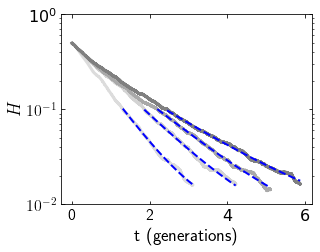

In [19]:
from scipy.optimize import curve_fit

fig,ax = plt.subplots(figsize=(4.5,3.5))
colors = ['gainsboro', 'lightgrey', 'darkgrey','grey']
plt.rcParams.update({
    "text.usetex": False,})
alpha = 0.01
Bsim =100
tau = 300

dt= 10
B0=100
for ci,tau in enumerate([150,300,450,600]):
    for i in range(1,len(fig6Bdata)):
        bd,ad,td,dt = fig6Bdata[i][0]

        if (ad==alpha)&(td==tau)& (bd==Bsim):
            
            het = fig6Bdata[i][1]

            x=np.arange(0,len(het)*dt,dt) / (1/alpha +tau)
            het_log= np.log(het)
            x_log = np.arange(0,len(het_log)*dt,dt) / (1/alpha +tau)



    hts=np.log(0.1)
    ts=np.argwhere(het_log>hts)[-1][0]


    popt, pcov = curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,x[ts:],  het[ts:],  p0=(.3, -0.001,.001))
    ax.plot(x,het,lw=3,c = colors[ci])
    ax.plot(x[ts:],  popt[0]*np.exp(popt[1]*x[ts:])+popt[2],linestyle='--',lw=2,color='blue')


#ax.legend()

ax.yaxis.tick_right()
ax.yaxis.set_ticks_position('both')
plt.tick_params(axis='y', which='minor')
ax.tick_params(direction='in',axis="x", bottom=True,
               top=True, labelbottom=True, labeltop=False)
ax.tick_params(direction='in',axis="y", left=True, right=True,labelleft=True,labelright=False)


plt.yscale('log')
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)


ax.set_yticks([0.01,0.1,1])
ax.set_yticklabels([r'$10^{-2}$' ,r'$10^{-1}$',r'$10^{0}$'])
xtcks = np.array([0,200,400,600])
ax.set_xticks(xtcks)
ax.set_xticklabels([0,2,4,6])
ax.set_xlabel(r' t (generations) ',fontsize=18)
plt.rcParams.update({
    "text.usetex":True,})

ax.set_ylabel(r' $H$ ',fontsize=18)
#plt.savefig('figs/hets_fit.eps')

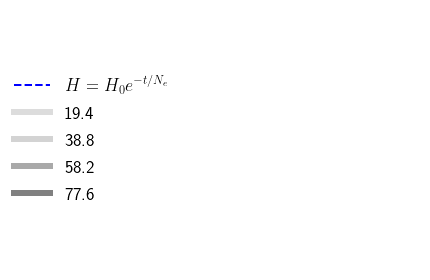

In [427]:
###legend for fig 6B produced separately
plt.rcParams.update({
    "text.usetex": True,})
ax.set_xlabel('$t$',fontsize=20)
ax.set_ylabel('$ln H$',fontsize=20)
plt.plot([],[],linestyle='--',lw=2,label= '$H = H_0 e^{-t/N_e}$',color='blue')


spaceToDeme = 115
Bm =2
Bspace = np.linspace(0,2,100)
e=1.66666
m = .25
D0=4.13
DBfit = lambda e,B,Bm,D0: ((1-B/Bm)/(1+B/(e*Bm)))*D0
B=1
Bsim=Bsims[B]
aScale= ((spaceToDeme *(m/2))/DBfit(e,Bsim /spaceToDeme,Bm,D0)  / 60 )

colors = ['gainsboro', 'lightgrey', 'darkgrey','grey']

plt.rcParams.update({
    "text.usetex": False,})

for ci,tau in enumerate([150,300,450,600]):
    plt.plot([],[] ,lw=6,c = colors[ci], label = str(round(tau*aScale,1)))
plt.rcParams.update({
    "text.usetex": True,})
leg = plt.legend(bbox_to_anchor = (.078,.8),fontsize=18,edgecolor='w')
leg.get_frame().set_alpha(0)

plt.axis('off')
#shifts = [140,140,140,140,140]
#cnt=0
#for t in leg.get_texts():
#    t.set_ha('right') # ha is alias for horizontalalignment
#    t.set_position((shifts[cnt],0))
#    cnt+=1

plt.tight_layout()
#plt.savefig('figs/hets_fit_leg.eps')

For each condition, we select the appropriate $t_s$ and $t_f$, transform the data and perform a linear fit to find $\Lambda$. We also perform an expontential fit to the form $y= A \exp(-\Lambda t )+B$, using the scipy curve-fitting package

In [428]:
spaceToDeme = 115
Bm =2
Bspace = np.linspace(0,2,100)
e=1.66666
m = .25
D0=4.13
DBfit = lambda e,B,Bm,D0: ((1-B/Bm)/(1+B/(e*Bm)))*D0
Bsim = 100
aScale= ((spaceToDeme *(m/2) )/DBfit(e,(Bsim /spaceToDeme),Bm,D0)  /60)
[tau*aScale for tau in [150,300,450,600]]

[19.41121926808437, 38.82243853616874, 58.233657804253106, 77.64487707233748]

In [98]:


datal= np.zeros((len(Bsims),len(taus[2]),len(alphas)))
dataV= np.zeros((len(Bsims),len(taus[2]),len(alphas)))
errorl = np.zeros((len(Bsims),len(taus[2]),len(alphas)))
datae= np.zeros((len(Bsims),len(taus[2]),len(alphas)))
errore= np.zeros((len(Bsims),len(taus[2]),len(alphas)))

tss = np.array([0.1,0.1,0.1,0.1])
popss = np.zeros((len(Bsims),len(taus[2]),len(alphas)))
dt=10
for B, Bsim in enumerate(Bsims):
    for a, alpha in enumerate(alphas):
        for t, tau in enumerate(taus[a]):
            for i in range(len(all_sim_data_trim)):
                bd,ad,td = all_sim_data_trim[i][0]
                
                if (ad==alpha)&(td==tau)& (bd==Bsim):
                    het = all_sim_data_trim[i][1] 
                    pop = all_sim_data_trim[i][2]
                    x= np.arange(0,len(het)*dt,dt) / (1/alpha +tau)
                    het_log= np.log(het)
                    x_log = np.arange(0,len(het_log)*dt,dt)/ (1/alpha +tau)
                    c,cov  =np.polyfit(x_log,het_log,1,cov=True)
                    popt, pcov = curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,x,  
                                           het,  p0=(.4, -0.005,.001))
                    datal[B,t,a] = -c[0]

                    errorl[B,t,a] = np.diag(cov)[0]
                    datae[B,t,a]=-popt[1]
                    errore[B,t,a] = np.diag(pcov)[1]
                    popss[B,t,a] = pop




                

As $\Lambda$ describes the rate of diversity loss, parameters that control $\Lambda$ can be viewed as changing the effective population size $N_e$. To illustrate this, we note that in a well-mixed population under neutral evolution the fixation probability of a single mutant is controlled only by the population size. Analagously to this effect, parameters that change the effect of neutral evolution in a population can be interpreted as changing the effective population and for this purpose we define $N_e \equiv 1/\Lambda$. We see below how increased implicit density dependence can increase the effective population.

In [104]:
m = .25
Br = 1
Dr = 2
B0 = 100
fixB_scale  = lambda m,Br,Dr,B0: (m*B0)/(2*Dr*Br)
fixL_scale  = lambda m,Br,Dr,B0: (m*B0)/(2*Dr*Br)
DBfit = lambda e,B,Bm,D0: ((1-B/Bm)/(1+B/(e*Bm)))*D0


<ipython-input-105-1876f4cbe8b6>:7: RuntimeWarning: divide by zero encountered in double_scalars
  lmax=1/np.min(datal)


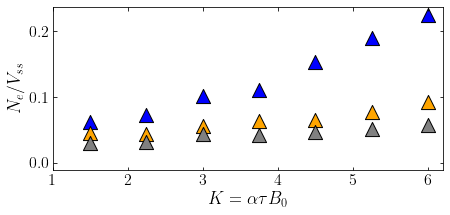

In [105]:
## fig6C

fig,ax=plt.subplots(figsize=(7,3))
plt.rcParams.update({
    "text.usetex": False,})
markers=["^","o","*",">"]
colors = ['blue', 'orange', 'gray']
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(datal)
lmin=1/np.max(datal)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

eFit = lambda t,a,b,c: a*np.exp(b*t)+c

B=2
Bsim=Bsims[B]


h=[]

h.append(ax.plot(0,0,c=colors[0],label= r'$.005$',lw=4)[0])
h.append(ax.plot(0,0,c=colors[1],label= r'$.01$',lw=4)[0])
h.append(ax.plot(0,0,c=colors[2],label= r'$.03$',lw=4)[0])

B=0
Bsim=Bsims[B]
for a,alpha in enumerate(alphas):
    for t,tau in enumerate(taus[a]):
        ax.scatter(taus[a][t]*alpha,((1/datal[B,t,a]) / popss[B,t,a]) ,
                   cmap=colormap,norm=normalize,s=200,marker=markers[B],c=colors[a],edgecolor='k')



ax.set_xlim([1,6.2])
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_tick_params(labelsize=16)


plt.tick_params(axis='y', which='minor')
ax.tick_params(direction='in',axis="x", bottom=True,
               top=True, labelbottom=True, labeltop=False)
ax.tick_params(direction='in',axis="y", left=True, right=True,labelleft=True,labelright=False)



plt.rcParams.update({
    "text.usetex": True,})
ax.set_xlabel(r'$K = \alpha \tau B_0$',fontsize=18)
ax.set_ylabel(r'$N_e /  V_{ss}  $',fontsize=18)

ax.set_yticks([0,0.1,0.2])

#plt.tight_layout()
#plt.savefig('figs/het_data_K_singleB0.pdf')

Text(0, 0.5, '$N_e / V_{ss}$')

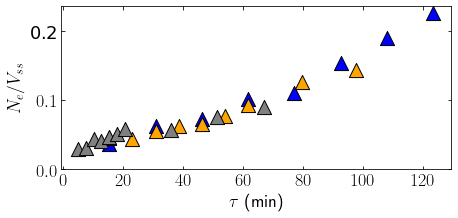

In [106]:
#fig 6d
fig,ax=plt.subplots(figsize=(7,3))
markers=["^","o","*",">"]
colors = ['blue', 'orange', 'gray']
eFit = lambda t,a,b,c: a*np.exp(b*t)+c
spaceToDeme = 115
Bm =2
Bspace = np.linspace(0,2,100)
e=1.66666
m = .25
D0=4.13
fitX = []
fitY = []

plt.rcParams.update({
    "text.usetex": True,})
B = 0
Bsim = Bsims[B]
for a,alpha in enumerate(alphas):

    for t,tau in enumerate(taus[a]):

        ax.scatter(tau*((spaceToDeme *(m/2) )/DBfit(e,(Bsim /spaceToDeme),Bm,D0)  /60),(((1)/datal[B,t,a])/popss[B,t,a]) ,
                   cmap=colormap,norm=normalize,s=200,marker=markers[B],c=colors[a],edgecolor='k')


ax.yaxis.set_tick_params(labelsize=18)
ax.xaxis.set_tick_params(labelsize=18)


for i in range(4):
    ax.scatter([],[],marker=markers[i],
               label=r'$'+str(Bsims[i])+'$',c='w',edgecolor='gray',s=140)
plt.tick_params(axis='y', which='minor')
ax.tick_params(direction='in',axis="x", bottom=True,
               top=True, labelbottom=True, labeltop=False)
ax.tick_params(direction='in',axis="y", left=True, right=True,labelleft=True,labelright=False)



h = []


plt.rcParams.update({
    "text.usetex": False,})

ax.set_yticks([0,.1,.2])

plt.rcParams.update({
    "text.usetex": True,})
ax.set_xlabel(r'$\tau$ (min)',fontsize=18)
ax.set_ylabel(r'$N_e / V_{ss}$',fontsize=18)

#plt.savefig('figs/het_data_tau_singleB0.eps')

In [32]:
alphas

array([0.005, 0.01 , 0.03 ])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

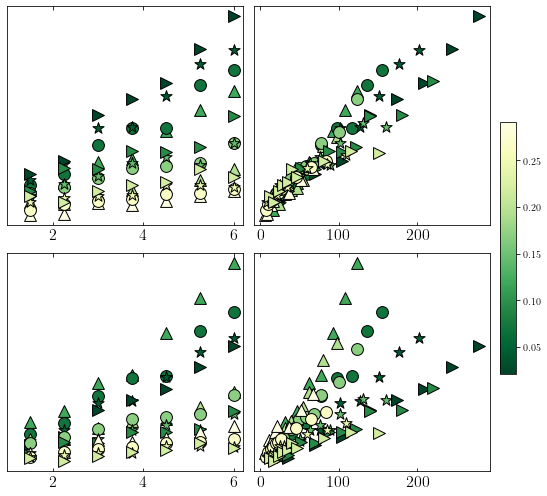

In [112]:
#Fig16

fig,axs = plt.subplots(2,2,figsize=(7,7),)

            
ax=axs[1,1]
spaceToDeme = 115
Bm =2
Bspace = np.linspace(0,2,100)
e=1.66666
m = .25
D0=4.13
DBfit = lambda e,B,Bm,D0: ((1-B/Bm)/(1+B/(e*Bm)))*D0


n = 12
colors = plt.cm.YlGn(np.linspace(1,0,n))
allScaledAlphas = np.array([[alpha/((spaceToDeme *(m/2))/DBfit(e,Bsim /spaceToDeme,Bm,D0)  / 60 ) for Bsim in Bsims] for alpha in alphas])
aMin =np.min(allScaledAlphas)
aMax =np.max(allScaledAlphas)
for ax in axs[0,:]:
    ax.set_yticks([0,0.05,0.1,0.15,0.2])
    
for ax in axs[1,:]:
    ax.set_yticks([0,100,200,300,400])
    
for ax in axs.flatten():
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.tick_right()
    ax.yaxis.set_ticks_position('both')
    ax.yaxis.set_tick_params(labelsize=16)
    #ax.set_yticks([.01,.1,1])

    plt.tick_params(axis='y', which='minor')
    ax.tick_params(direction='in',axis="x", bottom=True,
                   top=True, labelbottom=True, labeltop=False)
    ax.tick_params(direction='in',axis="y", left=True, right=True,labelleft=True,labelright=False)
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    

for ax in axs[:,0]:
    ax.set_xlim([1,6.2])


ax=axs[1,0]
for a,alpha in enumerate(alphas):
    for B, Bsim in enumerate(Bsims[:]):
        for t,tau in enumerate(taus[a]):
            aScale= ((spaceToDeme *(m/2))/DBfit(e,Bsim /spaceToDeme,Bm,D0)  / 60 )
            aInd = np.argwhere(alpha/aScale == np.sort(allScaledAlphas.flatten()))[0][0]
            ax.scatter(taus[a][t]*alpha,((1/datal[B,t,a]) / (popss[B,t,a])  ) ,
                       norm=normalize,s=140,marker=markers[B],c=colors[aInd],edgecolor='k')
ax=axs[0,0]
for a,alpha in enumerate(alphas):
    for B, Bsim in enumerate(Bsims[:]):
        for t,tau in enumerate(taus[a]):
            aScale= ((spaceToDeme *(m/2))/DBfit(e,Bsim /spaceToDeme,Bm,D0)  /  60 )
            aInd = np.argwhere(alpha/aScale == np.sort(allScaledAlphas.flatten()))[0][0]
            ax.scatter(taus[a][t]*alpha,((1/datal[B,t,a])  ) ,
                       norm=normalize,s=140,marker=markers[B],c=colors[aInd],edgecolor='k')
            
import warnings
warnings.filterwarnings('ignore')
            
ax=axs[1,1]
spaceToDeme = 115
Bm =2
Bspace = np.linspace(0,2,100)
e=1.66666
m = .25
D0=4.13
DBfit = lambda e,B,Bm,D0: ((1-B/Bm)/(1+B/(e*Bm)))*D0



for a,alpha in enumerate(alphas):
    for B, Bsim in enumerate(Bsims[:]):
        for t,tau in enumerate(taus[a]):
            aScale= ((spaceToDeme *(m/2))/DBfit(e,Bsim /spaceToDeme,Bm,D0)  / 60 )
            aInd = np.argwhere(alpha/aScale == np.sort(allScaledAlphas.flatten()))[0][0]
            ax.scatter(taus[a][t]*aScale,((1/datal[B,t,a]) / (popss[B,t,a])  ) ,
                       norm=normalize,s=140,marker=markers[B],c=colors[aInd],edgecolor='k')
ax=axs[0,1]
for a,alpha in enumerate(alphas):
    for B, Bsim in enumerate(Bsims[:]):
        for t,tau in enumerate(taus[a]):
            aScale= ((spaceToDeme *(m/2))/DBfit(e,Bsim /spaceToDeme,Bm,D0)  / 60 )
            aInd = np.argwhere(alpha/aScale == np.sort(allScaledAlphas.flatten()))[0][0]
            s = ax.scatter(taus[a][t]*aScale,((1/datal[B,t,a])  ) ,
                       norm=normalize,s=140,marker=markers[B],c=colors[aInd],edgecolor='k')
            
norm = plt.cm.colors.Normalize(vmax=aMax, vmin=aMin)
cax = fig.add_axes([1, 0.25, 0.03, 0.5]) 
#cax.set_xticks([0.05,0.07,0.09,0.11,0.13])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='YlGn_r'),cax=cax)
#cbar.set_ticks([0.05,0.07,0.09,0.11,0.13])
plt.tight_layout()
#plt.savefig('figs/HetSupp.eps')

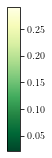

In [111]:
#fig 16 legend
fig =plt.figure()
cax = fig.add_axes([.3, 0.25, 0.03, 0.5]) 
#cax.set_xticks([0.05,0.07,0.09,0.11,0.13])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='YlGn_r'), cax=cax)
cbar.set_ticks([0.05,0.10,0.15,0.20,0.25])
plt.tight_layout()
#plt.savefig('figs/HetSupp_Bar.pdf')

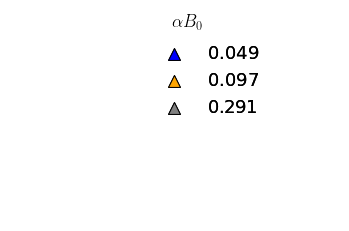

In [276]:
#fig 6c legend
fig,ax= plt.subplots()
plt.rcParams.update({
    "text.usetex": False,})
ax.axis('off')

B=0
Bsim=Bsims[B]
aScale= ((spaceToDeme *(m/2))/DBfit(e,Bsim /spaceToDeme,Bm,D0)  / 60 )

for i in range(3):
    ax.scatter([],[],marker='^',label=r'$' + str(round(alphas[i]/aScale,3)) + '$',c=colors[i],edgecolor='k',s=140)

#
leg= ax.legend(bbox_to_anchor=(.8,.9),fontsize=18,edgecolor='w')
ax.add_artist(leg)
leg.get_frame().set_alpha(0)

plt.rcParams.update({
    "text.usetex": True,})

ax.text(-.001,.045,r'$\alpha B_0$',fontsize=18)
#plt.tight_layout()
plt.savefig('figs/het_data_leg_singleB.eps')

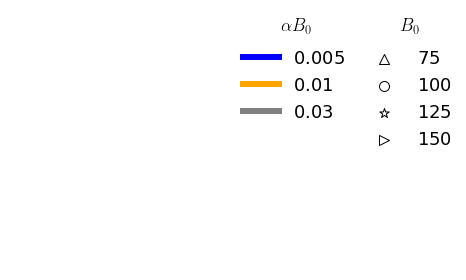

In [240]:
#fig 6d legend
fig,ax= plt.subplots()
plt.rcParams.update({
    "text.usetex": False,})
ax.axis('off')
for i in range(4):
    ax.scatter([],[],marker=markers[i],label=r'$'+str(Bsims[i])+'$',c='w',edgecolor='k',s=100)

#
leg= ax.legend(bbox_to_anchor=(1.3,.9),fontsize=18,edgecolor='w')
ax.add_artist(leg)
leg.get_frame().set_alpha(0)
h = []

for i in range(3):
    h.append(ax.plot([],[],c=colors[i],label= r'$'+str(alphas[i])+'$',lw=6)[0])
leg1 = ax.legend(handles=h, bbox_to_anchor=(1,.9),fontsize=18,edgecolor='w')
leg1.get_frame().set_alpha(0)

plt.rcParams.update({
    "text.usetex": True,})
ax.text(.03,.045,r'$\alpha B_0$',fontsize=18)
ax.text(.067,.045,r'$B_0$',fontsize=18)
plt.tight_layout()
#plt.savefig('figs/het_data_leg.eps')

Analogously to previous studies on single-species, we find that the heterozygosity decays exponentially over time, so that we can define an effective population size Ne as the inverse of the decay rate in units of generations. To account for the fact that adsorption rate, lysis time and bacterial density also change the density profile of the viral population, we nor- malize the effective population size by the steady-state value of the viral population in the bulk of the wave Vss. This normalization aims at providing a direct comparison between our system and previous theoretical studies where the carrying capacity of the population was held constant.

ur results show that the level of pushedness of the wave, controlled by K in the UDM-, can signficantly in- crease the normalized effective population size (two-fold increase between a pulled wave, K = 1.5, and just above the pushed transition, K = 3). However, we also find that, not surprisingly, K alone is not sufficient to de- termine the value of the effective population size of the expansion. Similar observations have been made before in single-species expansions, where distinct cooperativ- ity models, all displaying transitions between pulled and pushed waves, were found to be characterised by different values of Ne. Remarkably, we find that an excellent predictor for the value of Ne in the UDM- is the lysis time τ.